In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from numba import *

@njit()

def check_boundry(x,y,L):

    if x==0 or y==0 or x==L or y==L:

        return True

    return False
@njit()
def random_walk(x,y,L):
    i=0
    while(not check_boundry(x,y,L)):
        randomint=np.random.randint(4)
        x=x+(1-2*(randomint//2))
        y=y-(1-2*(randomint%2))
        i+=1
    return np.array([x,y,i],dtype=np.int32)

In [3]:
class solver1:
    def __init__(self,L,phi,K):
        self.K=K
        self.phi=phi
        self.L=L
        self.points=[[x,y] for x in range(1,L) for y in range(1,L)]
            
    def solve(self):
        solution=np.ndarray(shape=(self.L+1,self.L+1),dtype=np.float32)
        L=self.L
        for i in range(self.L+1):
            solution[0,i]=self.phi(0,i,L)
            solution[L,i]=self.phi(L,i,L)
            solution[i,0]=self.phi(i,0,L)
            solution[i,L]=self.phi(i,L,L)
        for point in self.points:
            cumul=np.float32(0)
            for i in range(self.K):
                Xt=random_walk(point[0],point[1],self.L)
                cumul+=self.phi(Xt[0],Xt[1],L)
            cumul/=self.K
            solution[point[0],point[1]]=cumul
        return np.transpose(solution)

In [4]:
def phi(x,y,L):
    if x==0 or x==L:
        return 1
    if y==0 or y==L:
        return 0

In [5]:
A=solver1(300,phi,10)

In [6]:
data=A.solve()

<AxesSubplot:>

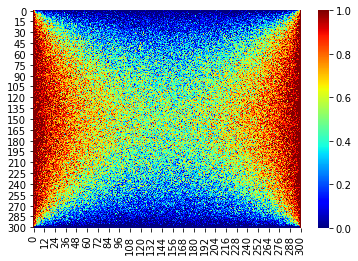

In [7]:
sns.heatmap(data,cmap='jet')

In [8]:
class solver2:
    def __init__(self,L,phi,gamma,K):
        self.gamma=gamma
        self.K=K
        self.beta=np.log(1+gamma/(4*(gamma+L**2)))#on utilise la formule de alpha donnée dans l'exercice 2 de la pc2 puis la relation entre alpha et beta
        self.phi=phi
        self.L=L
        self.points=[[x,y] for x in range(1,L) for y in range(1,L)]
            
    def solve(self):
        solution=np.ndarray(shape=(self.L+1,self.L+1),dtype=np.float32)
        L=self.L
        for i in range(self.L+1):
            solution[0,i]=self.phi(0,i,L)
            solution[L,i]=self.phi(L,i,L)
            solution[i,0]=self.phi(i,0,L)
            solution[i,L]=self.phi(i,L,L)
        for point in self.points:
            cumul=np.float32(0)
            for i in range(self.K):
                Xt=random_walk(point[0],point[1],self.L)
                cumul+=self.phi(Xt[0],Xt[1],L)*np.exp(-1*self.beta*Xt[2])
            cumul/=self.K
            solution[point[0],point[1]]=cumul
        return np.transpose(solution)

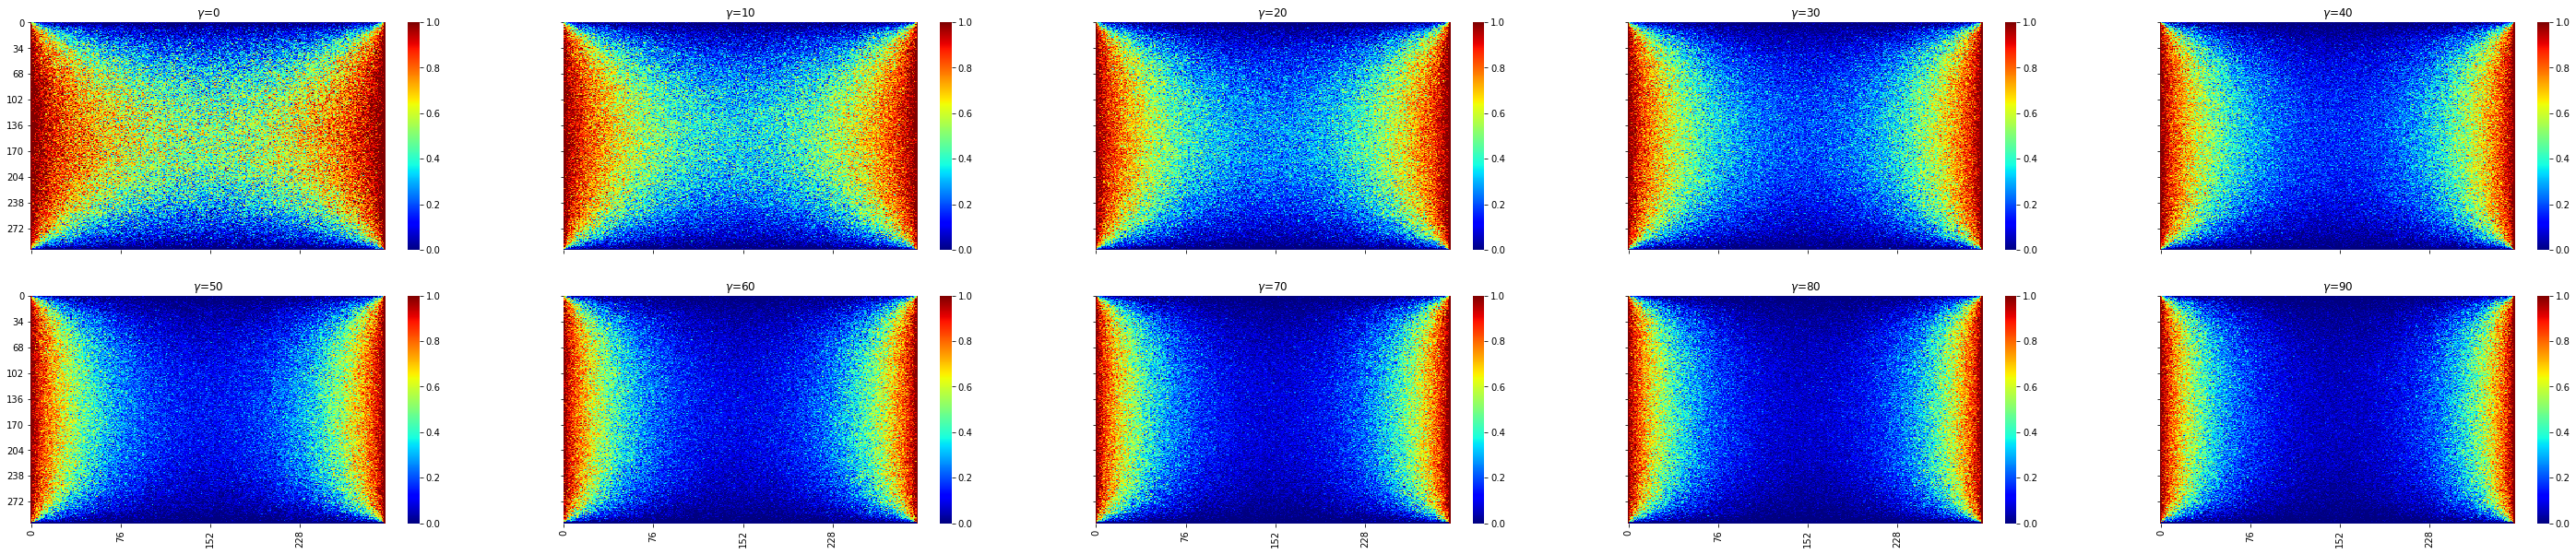

In [9]:
L=[solver2(300,phi,i,10).solve() for i in range(0,100,10)]
fig,axes=plt.subplots(2,5,sharex=True, sharey=True)
for i in range(10):
    sns.heatmap(L[i],cmap='jet',ax=axes[i//5][i%5])
    gamma=10*i
    axes[i//5][i%5].set_title('$\gamma$='+str(gamma))
fig.set_size_inches(50,10)
plt.show()